In [7]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from unidecode import unidecode
import matplotlib.font_manager as font_manager

font_path = '/kaggle/input/arvo-fonts/Arvo-Bold.ttf'
font_props = font_manager.FontProperties(fname=font_path)




In [9]:
mls_df = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")
ptfc_player = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_players_clean.csv")
mls_df = mls_df[mls_df['league_name'] == 'Major League Soccer']
ptfc_player = ptfc_player[ptfc_player['team_name'] == 'Portland Timbers']
ptfc_player['player_name'] = ptfc_player['player_name'].apply(unidecode)
mls_df.shape # 5226 games, 39 columns
ptfc_player.shape


# Extract only Timbers games from the data
timbers_home = mls_df["teams_home_name"] == "Portland Timbers"
timbers_away = mls_df["teams_away_name"] == "Portland Timbers"
timbers_any = timbers_home | timbers_away
timbersdf = mls_df[timbers_any]
print(timbersdf[['teams_home_name','teams_away_name','league_season']].head(5)) # display matchups
print(timbersdf[['teams_home_name','teams_away_name','league_season']].tail(5)) # display matchups
timbersdf.shape # 455 games, 39 data columns
timbersdf.columns

<ipython-input-9-ad901b5aa1ca>:1: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  mls_df = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")


          teams_home_name   teams_away_name  league_season
228   Vancouver Whitecaps  Portland Timbers           2024
290        St. Louis City  Portland Timbers           2024
420    Philadelphia Union  Portland Timbers           2013
447            Toronto FC  Portland Timbers           2012
1330         Nashville SC  Portland Timbers           2022
        teams_home_name      teams_away_name  league_season
44474   Orlando City SC     Portland Timbers           2016
46909  Portland Timbers       Real Salt Lake           2019
46911  Portland Timbers  Vancouver Whitecaps           2019
48122  Portland Timbers      Orlando City SC           2020
48130  Portland Timbers       Houston Dynamo           2020


Index(['fixture_id', 'fixture_date', 'fixture_timezone', 'fixture_timestamp',
       'fixture_periods_first', 'fixture_periods_second', 'fixture_referee',
       'fixture_venue_id', 'fixture_venue_name', 'fixture_venue_city',
       'fixture_status_long', 'fixture_status_short', 'fixture_status_elapsed',
       'fixture_status_extra', 'league_id', 'league_name', 'league_country',
       'league_logo', 'league_flag', 'league_season', 'league_round',
       'teams_home_id', 'teams_home_name', 'teams_home_logo',
       'teams_home_winner', 'teams_away_id', 'teams_away_name',
       'teams_away_logo', 'teams_away_winner', 'goals_home', 'goals_away',
       'score_halftime_home', 'score_halftime_away', 'score_fulltime_home',
       'score_fulltime_away', 'score_extratime_home', 'score_extratime_away',
       'score_penalty_home', 'score_penalty_away'],
      dtype='object')

In [10]:
season = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")

<ipython-input-10-917d1254ba6f>:1: DtypeWarning: Columns (24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  season = pd.read_csv("/kaggle/input/football-match-statistics-and-more/fixture_stats_clean.csv")


In [11]:
season = season[['fixture_id','league_season']]
ptfc_player = ptfc_player.merge(season,left_on = ['fixture_id'],right_on = ['fixture_id'])

In [12]:
ptfc = ptfc_player.groupby('league_season').get_group(2017)
ptfc = ptfc[ptfc['player_name'] == 'Diego Valeri']
display(ptfc.sort_values('rating').head(5)[['game_minutes',
       'rating', 'captain', 'shots_total', 'shots_on',
       'goals_total', 'goals_conceded', 'assists', 'saves', 'total_passes',
       'completed_passes', 'pass_percentage', 'key_passes', 'total_tackles', 'interceptions_tackles', 'duels_won',
       'dribbles_attempts', 'dribbles_success']])


,game_minutes,rating,captain,shots_total,shots_on,goals_total,goals_conceded,assists,saves,total_passes,completed_passes,pass_percentage,key_passes,total_tackles,interceptions_tackles,duels_won,dribbles_attempts,dribbles_success
1465,89.0,0.0,False,1,0,0,1,0,0,30,23,75.0,0,1,1,0,0,0
4541,90.0,6.0,False,2,1,0,0,0,0,15,9,62.0,1,0,1,1,1,0
1039,90.0,6.2,True,1,0,0,0,0,0,30,20,68.0,5,0,0,1,2,0
3209,90.0,6.2,False,1,0,0,0,0,0,26,18,70.0,1,0,0,5,3,0
5398,89.0,6.5,True,4,0,0,0,0,0,30,22,73.0,1,0,0,6,1,1


In [13]:
szn_avgs = ptfc_player.groupby(['league_season','player_name']).agg(
    matches_played=('fixture_id', 'count'),  # Count matches played per player per season
    avg_rating=('rating', 'mean')  # Example: Average rating per player
).reset_index()

In [14]:
szn_avgs = szn_avgs[szn_avgs['matches_played'] > 0]
szn_avgs[szn_avgs['league_season'] == 2018]
szn_avgs.columns

Index(['league_season', 'player_name', 'matches_played', 'avg_rating'], dtype='object')

In [15]:
szn_avgs.sort_values('avg_rating',ascending=True).head(10)

,league_season,player_name,matches_played,avg_rating
233,2023,Jaden Jones-Riley,1,0.0
278,2024,Trey Muse,11,0.0
206,2022,Justin Vom Steeg,5,0.0
158,2020,Zac McGraw,4,0.0
279,2024,Tyler Clegg,1,0.0
134,2020,Blake Bodily,1,0.0
232,2023,Hunter Sulte,15,0.0
61,2017,Harold Hanson,1,0.0
246,2023,Tyler Clegg,2,0.0
44,2016,Neco Brett,1,0.0


In [16]:
szn_avgs = szn_avgs[szn_avgs['matches_played'] > 8]

['0', '2', '4', '6', '8', '10']


<ipython-input-17-dfc016426720>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = label_y,fontproperties=font_props)


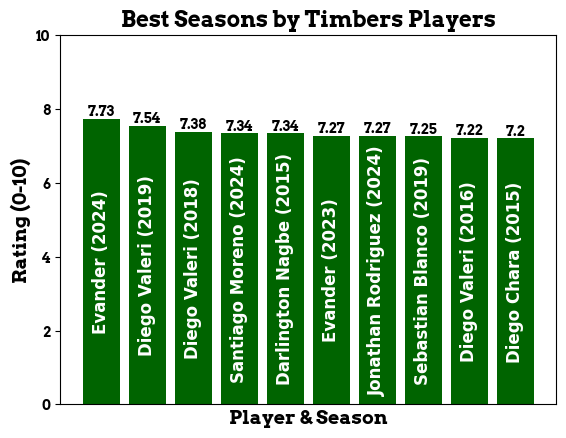

In [17]:
width = 0.6  # the width of the bars: can also be len(x) sequence

graph_data = szn_avgs.sort_values('avg_rating',ascending=False).head(10)

fig, ax = plt.subplots()

graph_data['NameSzn'] = graph_data['player_name'].astype(str) + ' (' + graph_data['league_season'].astype(str) + ')'  
# Convert the league season to strings properly
bar_container = ax.bar(graph_data['NameSzn'], graph_data['avg_rating'].round(2),color='darkgreen')

label_y = [str(y) for y in list(range(0,11,2))]
print(label_y)

plt.xticks([])
ax.set_yticklabels(labels = label_y,fontproperties=font_props)
ax.set_title('Best Seasons by Timbers Players',fontproperties=font_props,fontsize = 16)
ax.set_xlabel('Player & Season',fontproperties=font_props,fontsize=14)
ax.set_ylabel('Rating (0-10)',fontproperties=font_props,fontsize=14)
ax.set_ylim(0,10)

# Add x-axis labels inside the bars
for bar, label in zip(bar_container, graph_data['NameSzn']):
    ax.text(
        bar.get_x() + bar.get_width()/2,  # X position (center of bar)
        bar.get_height()/2,  # Y position (middle of bar)
        label,  # Text (category label)
        ha='center', va='center', fontsize=12, color='white', fontweight='bold',
        rotation=90
    )

# Add bar labels
ax.bar_label(bar_container,fontproperties=font_props)

# Show plot
#plt.show()

plt.savefig('timbers_best.png',dpi = 500)